# Download MICECAT data

In [1]:
from micecat_auto import *

In [8]:
# automatically query MICECAT data in a list of icat, and save in
# mypaths['MCcatdat'] + 'all_fields/' + 'micecat_%d.csv.bz2'%icat

#run_micecat_query(np.arange(241,400))

In [9]:
# run 2-halo stacking, in batch of 20 MICECAT fields

#run_micecat_auto_batch(1,0,istart=200)

#### check missing file

In [2]:
from ciber_info import *
icat_arr = np.arange(0,400)
for icat in icat_arr:
    fdir = mypaths['MCcatdat'] + 'all_fields/'
    fname = 'micecat_%d.csv.bz2'%icat
    if fname not in os.listdir(mypaths['MCcatdat'] + 'all_fields/'):
        print(fname + 'does not exist!')

# Compare 2-halo stacking 90 & 400 MICECAT fields

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


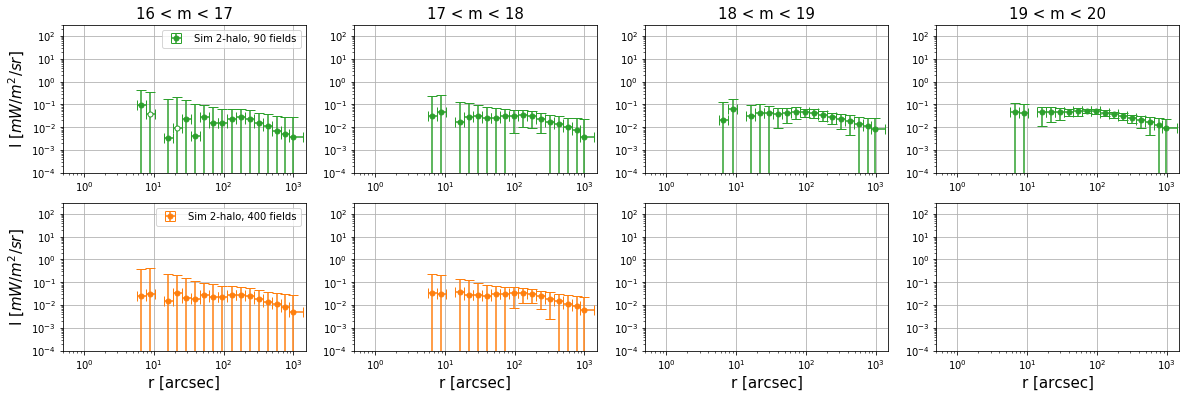

In [13]:
from utils import *
from micecat import *
from micecat_auto import *

for inst in [1]:
    fig, ax = plt.subplots(2, 4, figsize = (20,6))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[0][im], color='C2',label='Sim 2-halo, 90 fields')
        
        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen_auto(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[1][im], color='C1',label='Sim 2-halo, 400 fields')

        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][0].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][0].legend(fontsize=10)

# fig.savefig('/Users/ytcheng/Desktop/morefields.png',
#              dpi = 150, bbox_inches='tight')

# 2-halo filtering

/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:78: RuntimeWarning: invalid value encountered in greater_equal
  spp = np.where(y>=0)[0]
/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:79: RuntimeWarning: invalid value encountered in less
  spn = np.where(y<0)[0]
No handles with labels found to put in legend.


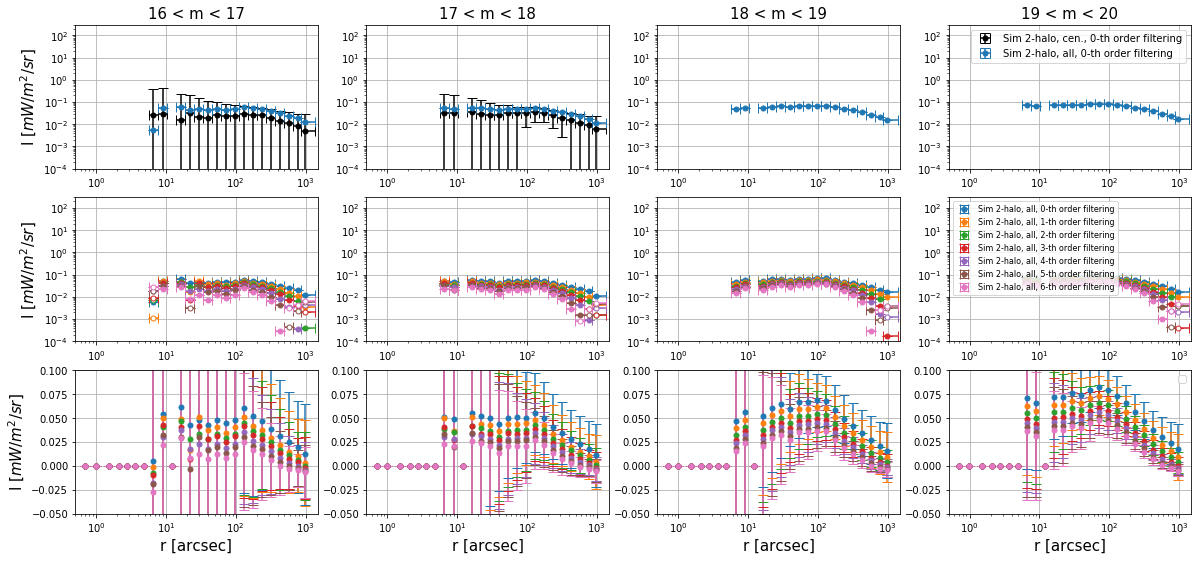

In [1]:
# run_micecat_auto_batch(inst, field(0~9), filt_order_arr=[0,1,2,3,4,5,6],
# mag_stack=[0,1], Mhcut=1e14, R200cut=0, zcut=0.15)

from micecat_auto import *

for inst in [1]:
    fig, ax = plt.subplots(3, 4, figsize = (20,9))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_auto(inst, im, filt_order=0,
                                                        run_type='cen', sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[0][im], color='k',label='Sim 2-halo, cen., 0-th order filtering')

        rbins, mc_avg, mc_std, _ = get_micecat_sim_auto(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std*0,
                 ax=ax[0][im], color='C0',label='Sim 2-halo, all, 0-th order filtering')

        for i,filt_order in enumerate(range(7)):
            rbins, mc_avg, mc_std, data_all,icat_arr = get_micecat_sim_auto(inst, im,
                                                            filt_order=filt_order, sub=False,return_icat=True)
#             print(im, filt_order, data_all.shape,len(icat_arr))
            plot_err_log(rbins, 
                     mc_avg, mc_std*0,
                     ax=ax[1][im], color='C'+str(i),
                         label='Sim 2-halo, all, %d-th order filtering'%filt_order)
            ax[2][im].errorbar(rbins, mc_avg, mc_std, fmt ='.', color='C'+str(i),
                               capsize=5, markersize=10)
                
        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        
        ax[2][im].set_xscale('log')
        ax[2][im].set_ylim([-0.05,0.1])
        ax[2][im].set_xlim([5e-1,1.5e3])
        ax[2][im].grid()    
        ax[2][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][-1].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][-1].legend(fontsize=8)
    ax[2][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[2][-1].legend(fontsize=10)

fig.savefig('/Users/ytcheng/Desktop/micecat_filt.png',
             dpi = 150, bbox_inches='tight')

# 2-Halo Model Fit

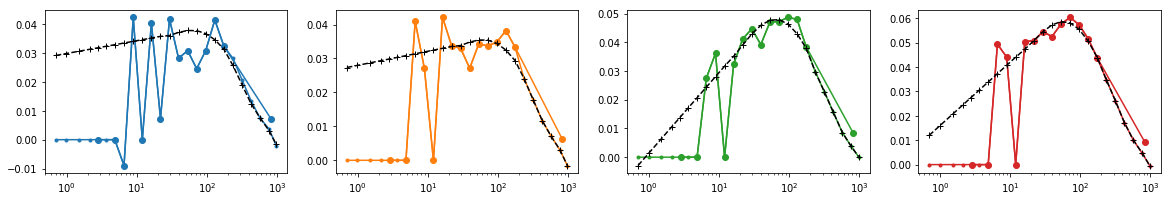

In [25]:
from micecat_auto import *

inst = 1
for filt_order in range(7):
    if filt_order==3:
        fig, ax = plt.subplots(1, 4, figsize = (20,3))
    for im in [0,1,2,3]:
        rbins, mc_avg, mc_avg_fit, rsubbins, mc_avgsub, mc_avgsub_fit = \
            micecat_profile_fit(inst, im, filt_order=filt_order, return_full=True)    
        if filt_order==3:
            ax[im].semilogx(rbins, mc_avg,'.-',c='C'+str(im))
            ax[im].semilogx(rsubbins, mc_avgsub,'o-',c='C'+str(im))
            ax[im].semilogx(rbins, mc_avg_fit,'+--',c='k')

In [ ]:
# from run_fit import *
# fit_stacking_mcmc(inst, ifield, im ,filt_order).run_mcmc()
# # 1-2, 4-8, 0-3, 3

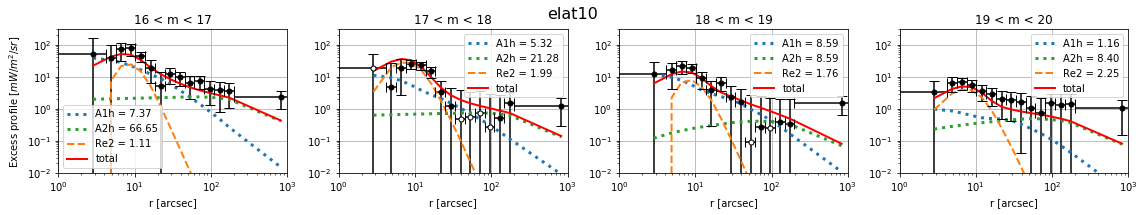

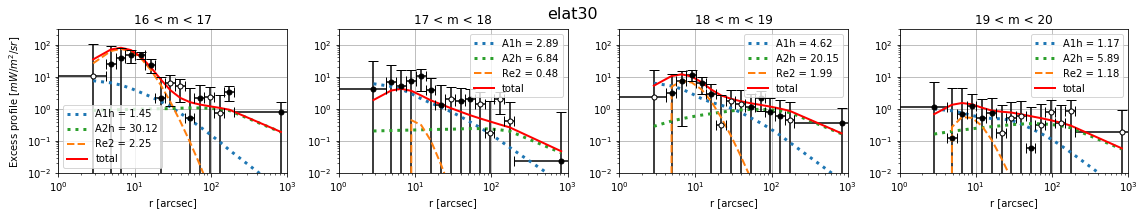

In [43]:
from run_fit import *

inst = 1
filt_order = 3
for ifield in [4,5]:
    fig, ax = plt.subplots(1, 4, figsize = (16,3))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        param_fit = fit_stacking_mcmc(inst, ifield, im, filt_order)
        fitparamdat = get_mcmc_fit_params_3par(inst,im, ifield=ifield)
        Re2 = fitparamdat['Re2']
        A1h = fitparamdat['A1h']
        A2h = fitparamdat['A2h']
        #Re2, A1h, A2h = 2, 1, 1
        r_arr = param_fit.rsubbins
        profd_arr = param_fit.profex_sub
        profd_err = np.sqrt(np.diag(param_fit.covsub))
        modelprof = param_fit.get_profexcess_model(Re2=Re2, A1h=A1h, A2h=A2h)
        profex_arr = modelprof['profex_sub']
        prof1h_arr = modelprof['prof1h_sub']
        prof2h_arr = modelprof['prof2h_sub']
        chi2 = param_fit.get_chi2(Re2=Re2, A1h=A1h, A2h=A2h)
        rbinedges = param_fit.rsubbinedges
        ax[im].loglog(r_arr, prof1h_arr,'C0:', lw=3, label='A1h = %.2f'%A1h)
        ax[im].loglog(r_arr, prof2h_arr,'C2:', lw=3, label='A2h = %.2f'%A2h)
        ax[im].loglog(r_arr, profex_arr,'C1--', lw=2, label='Re2 = %.2f'%Re2)
        ax[im].loglog(r_arr, profex_arr + prof1h_arr + prof2h_arr,'r-', lw=2,
                     label = 'total')
        
        plot_err_log(r_arr, 
                     profd_arr,
                     profd_err,
                     xedges = rbinedges,
                     ax=ax[im], color='k')


        ax[im].set_title('%d < m < %d'%(m_min, m_max))
        ax[im].set_ylim([1e-2,3e2])
        ax[im].set_xlim([1e0,1e3])
        ax[im].grid()
        ax[im].legend()
        ax[im].set_xlabel('r [arcsec]')
    ax[0].set_ylabel('Excess profile [$mW/m^2/sr$]')
    fig.suptitle(fieldnamedict[ifield], fontsize=16)

    plt.tight_layout()
#     plt.savefig('/Users/ytcheng/Desktop/profile_best_TM%d_%s.png'%(inst,param_fit.field), dpi = 150)

In [75]:
from run_fit import *
import corner

inst = 1

for ifield in [4,5]:
    if ifield==0:
        truths_arr = []
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        
        R200 = gal_profile_model().Wang19_profile(0,im)['params']['R200']
        xe2_W19 = gal_profile_model().Wang19_profile(0,3)['params']['sersic2'][2]
        Re2_W19 = R200 * xe2_W19
        
        if ifield==0:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_3par_joint' + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'
        else:
            savedir = mypaths['alldat'] + 'TM' + str(inst) + '/'
            savename = 'mcmc_3par_' + fieldnamedict[ifield] + \
            '_m' + str(m_min) + '_' + str(m_max) + '.npy'

        samples = np.load(savedir + savename)
        steps, nwalkers, nparams = samples.shape

        flatsamps = samples.copy()
        flatsamps[:,:,0] = flatsamps[:,:,0] * R200
        flatsamps = flatsamps[100:,:,:].reshape((-1,3))

        bins0 = np.linspace(np.min(flatsamps[:,0]), np.max(flatsamps[:,0]), 20)
        bins1 = np.linspace(np.min(flatsamps[:,1]), np.max(flatsamps[:,1]), 20)
        bins2 = np.linspace(np.min(flatsamps[:,2]), np.max(flatsamps[:,2]), 20)
        
        if ifield==0:
            truths_arr.append(np.median(flatsamps, axis=0))

        levels= 1.0 - np.exp(-0.5 * np.arange(1, 2.1, 1) ** 2)
        figure = corner.corner(flatsamps, levels = levels,fill_contours=True,plot_datapoints=False,
                               bins=[bins0, bins1, bins2],label_kwargs={'fontsize':'xx-large'},
                               range=[(0,5),(0,20),(0,200)],
                               title_kwargs={'fontsize':'x-large'},
                               show_titles=True,labels=["$R_{e_2}$", r"$A_{\rm 1h}$", r"$A_{\rm 2h}$"],
                               truths=[Re2_W19,1,1])
        if ifield==0:
            plt.savefig('plots/TM%d/mcmc_joint_m%d_%d.png'\
                        %(inst,m_min, m_max), dpi=150)
        else:
            plt.savefig('plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst,fieldnamedict[ifield], m_min, m_max), dpi=150)

        plt.close()
        

#combine four mag plots into one plot
from run_fit import *
from PIL import Image
import os

for ifield in [4,5]:
    result = Image.new("RGB", (3200,800))    
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):
        fieldname = 'joint' if ifield==0 else fieldnamedict[ifield]
        fname = 'plots/TM%d/mcmc_%s_m%d_%d.png'\
                        %(inst, fieldname, m_min, m_max)
        path = os.path.expanduser(fname)
        img = Image.open(path)
        img.thumbnail((800, 800), Image.ANTIALIAS)
        x = im * 800
        y = 0
        w, h = img.size
        result.paste(img, (x, y, x + w, y + h))
        os.remove(fname)
    
    result.save(os.path.expanduser('plots/TM%d/mcmc_%s_3par.png'%(inst,fieldname)))

In [78]:
# from run_fit import *
fit_param = joint_fit_mcmc(1,0,3)

In [80]:
sampler = fit_param.run_mcmc(nwalkers=6, steps=3, return_sampler=True, save_chain=False)

100%|██████████| 3/3 [04:51<00:00, 97.19s/it] 


In [85]:
sampler.get_chain().shape

(3, 6, 3)